### BigMart Sales Prediction practice problem

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Mining

In [2]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

### Exploratory Data Analysis

In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

We need to predict Item_Outlet_Sales for given test data

lets first merge the train and test data for Exploratory Data Analysis

In [6]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [7]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<ipython-input-8-e2b58dbb7453>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

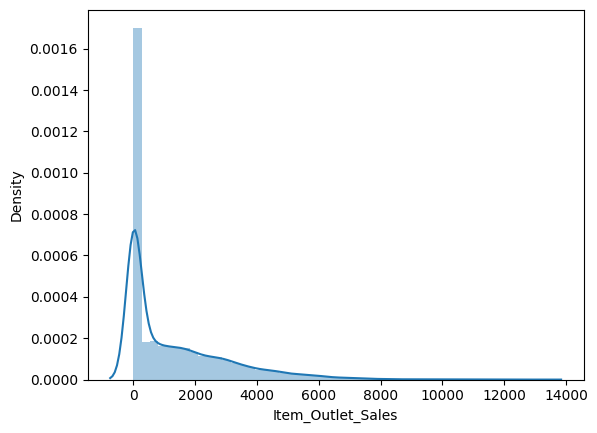

In [8]:
sns.distplot(data['Item_Outlet_Sales'])

Deviate from the normal distribution.

Have appreciable positive skewness.

Show peakedness.

In [9]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439


In [10]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [13]:
import pandas as pd

# Assuming 'data' is your DataFrame
categorial_features = data.select_dtypes(include=[object])
categorial_features.head(2)


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [14]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [15]:
data['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: count, dtype: int64

### Finding Missing values

In [16]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

Some observations:

Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

The lower ‘count’ of Item_Weight and Outlet_Size confirms the findings from the missing value check.

In [17]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable.

In [18]:
#frequency of categories
for col in categorial_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())


Item_Identifier column: 
Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: count, Length: 1559, dtype: int64

Item_Fat_Content column: 
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

Item_Type column: 
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

Outlet_Identifier column: 
Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046   

Lets start looking Outlet_Size, Outlet_Location_Type, and Outlet_Type distribution in Item_Outlet_Sale

<ipython-input-20-210378f014e1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
<ipython-input-20-210378f014e1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="Set1")


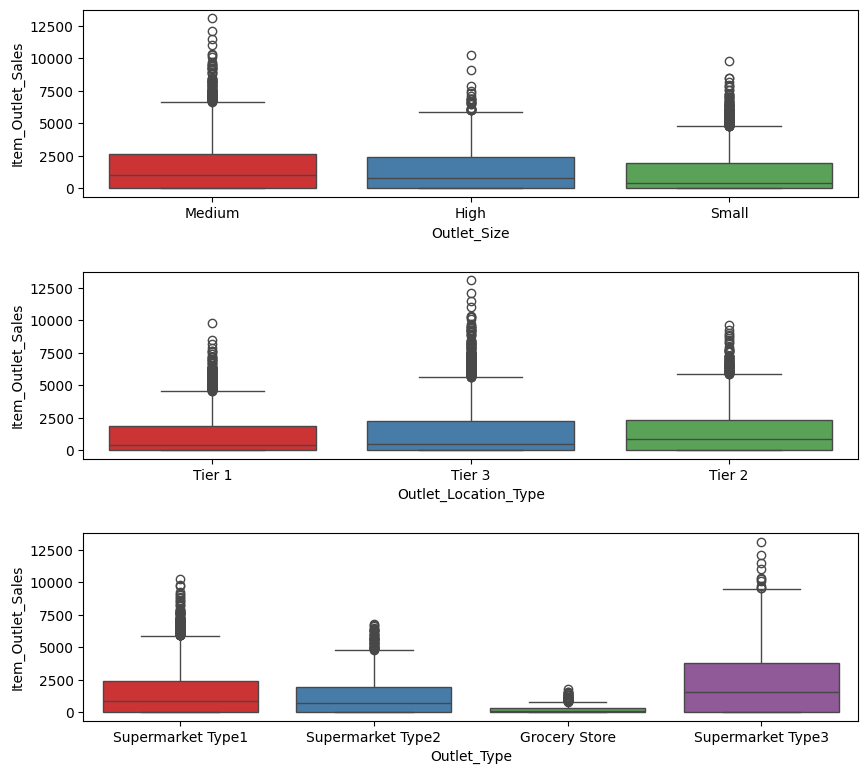

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the DataFrame index is unique
data = data.reset_index(drop=True)

plt.figure(figsize=(10, 9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace=0.2, hspace=0.4, top=0.9)  # Adjusted 'top' parameter to fit the plot within the figure

plt.show()


<ipython-input-21-647e4170613a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
<ipython-input-21-647e4170613a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")


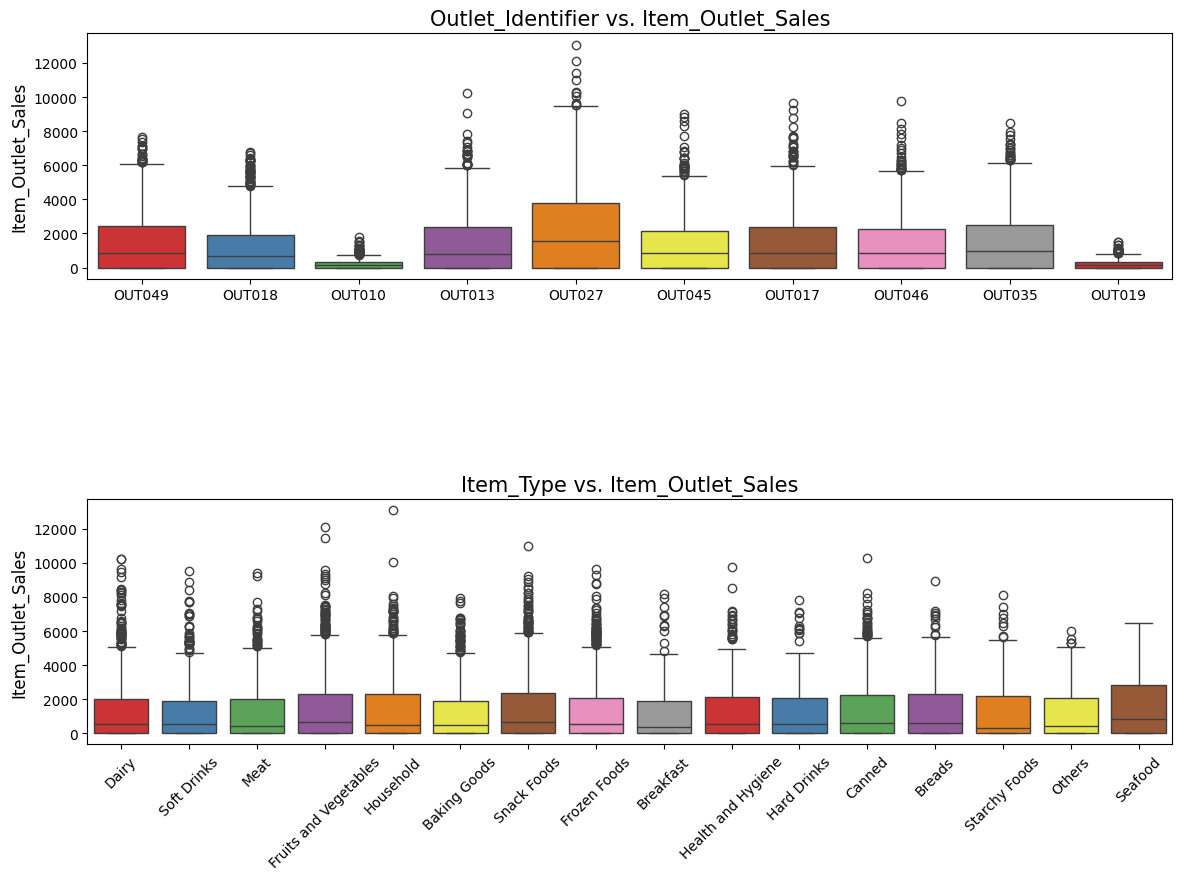

In [21]:
  plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

### Data Cleaning and Imputing Missing Values

We found two variables with missing values – Item_Weight and Outlet_Size. Lets impute the former by the average weight of the particular item.

In [22]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

missing_values = data['Item_Weight'].isnull()
print('Missing values: %d' %sum(missing_values))

data.loc[missing_values,'Item_Weight']  = data.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print('Missing values after immputation %d' %sum(data['Item_Weight'].isnull()))

Missing values: 2439
Missing values after immputation 0


This confirms that the column has no missing values now. Lets impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [27]:
import pandas as pd

# Determine the mode for each Outlet_Type
outlet_size_mode = data.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0])

print('Mode for each Outlet_Type:')
print(outlet_size_mode)

# Get a boolean variable specifying missing Outlet_Size values
missing_values = data['Outlet_Size'].isin(['nan', 'None'])

# Impute data and check #missing values before and after imputation to confirm
print('\nOriginal #missing: %d' % sum(missing_values))

# Apply the mode for the corresponding Outlet_Type to missing values
data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].map(outlet_size_mode)

print('Missing values after imputation: %d' % sum(data['Outlet_Size'].isin(['nan', 'None'])))


Mode for each Outlet_Type:
Outlet_Type
Grocery Store           nan
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

Original #missing: 4016
Missing values after imputation: 925


## Modify Item_Visibility

In [28]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


### Create a broad category of Type of Item

In [29]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()


Item_Type_Combined
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

### Modify categories of Item_Fat_Content

In [30]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

Modified Categories:
Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64


<ipython-input-31-ac1908f92fc2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=data, palette="Set1")
<ipython-input-31-ac1908f92fc2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette="Set1")


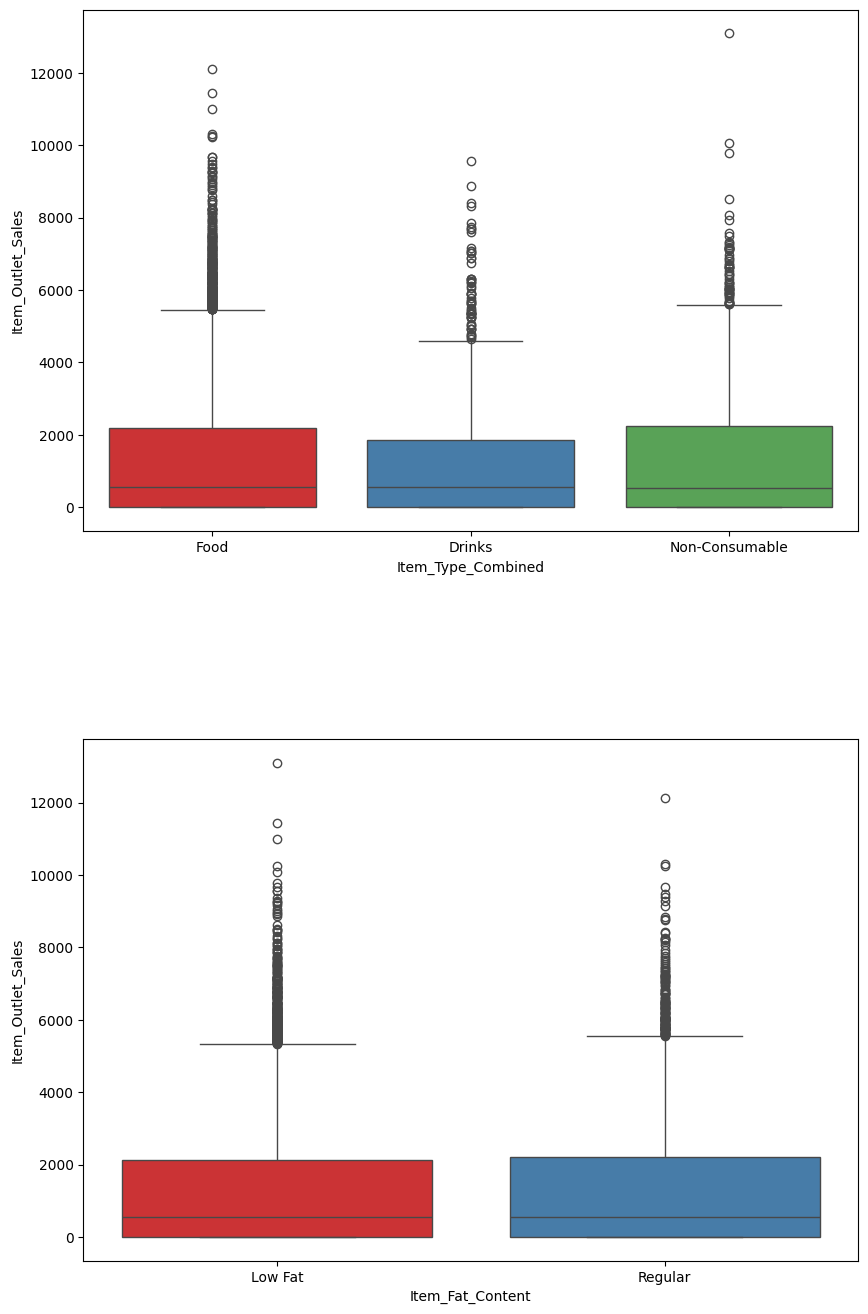

In [31]:
plt.figure(figsize = (10,9))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

<ipython-input-32-647e4170613a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
<ipython-input-32-647e4170613a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")


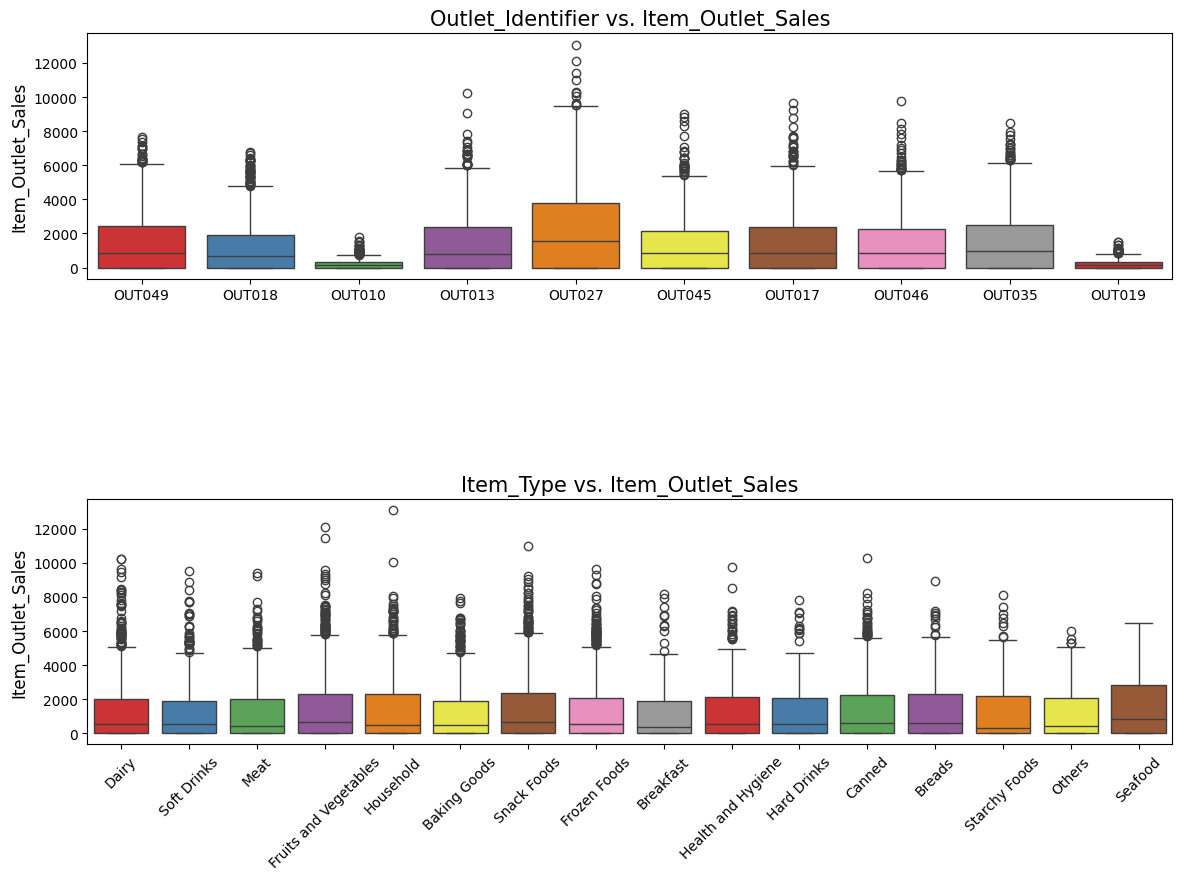

In [32]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [33]:
data.index = data['Outlet_Establishment_Year']
data.index

Index([1999, 2009, 1999, 1998, 1987, 2009, 1987, 1985, 2002, 2007,
       ...
       1999, 1999, 2009, 1997, 1999, 1997, 2009, 2002, 2007, 2002],
      dtype='int64', name='Outlet_Establishment_Year', length=14204)

In [34]:
df = data.loc[:,['Item_Outlet_Sales']]
df.head(2)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1999,3735.1380
2009,443.4228


In [42]:
print(data.head())


                          Item_Identifier  Item_Weight Item_Fat_Content  \
Outlet_Establishment_Year                                                 
1999                                FDA15         9.30          Low Fat   
2009                                DRC01         5.92          Regular   
1999                                FDN15        17.50          Low Fat   
1998                                FDX07        19.20          Regular   
1987                                NCD19         8.93          Low Fat   

                           Item_Visibility              Item_Type  Item_MRP  \
Outlet_Establishment_Year                                                     
1999                              0.016047                  Dairy  249.8092   
2009                              0.019278            Soft Drinks   48.2692   
1999                              0.016760                   Meat  141.6180   
1998                              0.017834  Fruits and Vegetables  182.0950   


Determine the years of operation of a store

In [43]:
data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

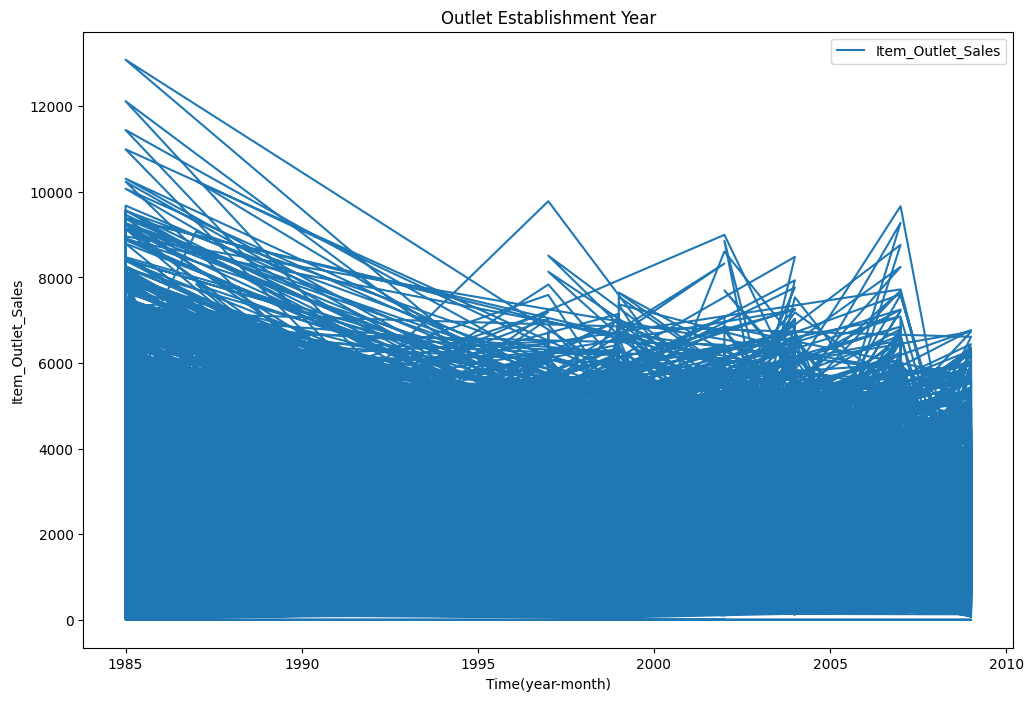

In [44]:
data.index = data['Outlet_Establishment_Year']
df = data.loc[:,['Item_Outlet_Sales']]
ts = df['Item_Outlet_Sales']
plt.figure(figsize=(12,8))
plt.plot(ts, label='Item_Outlet_Sales')
plt.title('Outlet Establishment Year')
plt.xlabel('Time(year-month)')
plt.ylabel('Item_Outlet_Sales')
plt.legend(loc = 'best')
plt.show()

<ipython-input-45-9f2b16c2f287>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)


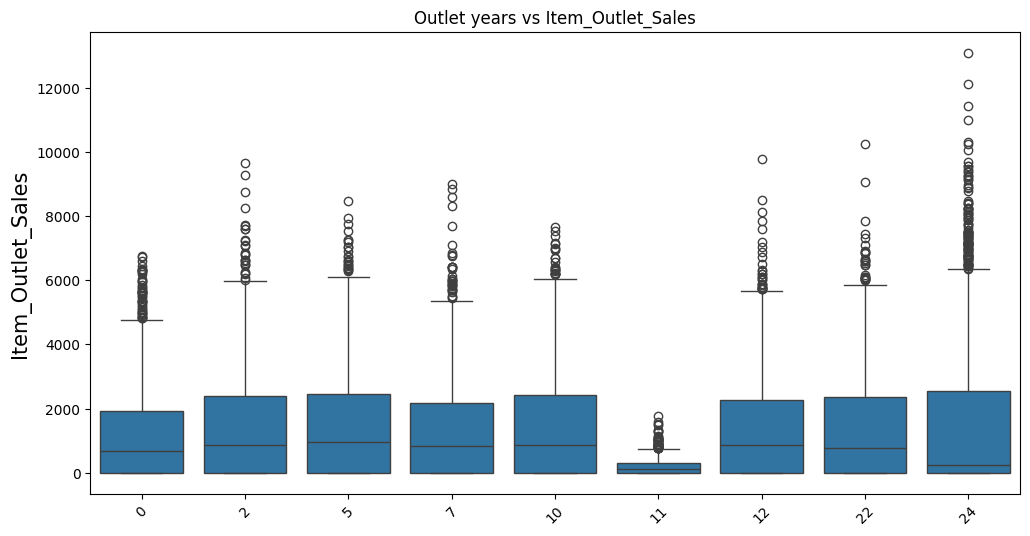

In [45]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = 'Outlet_Years', y = 'Item_Outlet_Sales', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Outlet years vs Item_Outlet_Sales')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15)

plt.show()

In [46]:
temp_data = data.loc[data['Outlet_Establishment_Year'] == 1998]

In [47]:
temp_data['Outlet_Type'].value_counts()

Outlet_Type
Grocery Store    925
Name: count, dtype: int64

In [48]:
test_temp_data = test.loc[test['Outlet_Establishment_Year'] == 1998]
test_temp_data['Outlet_Type'].value_counts()

Outlet_Type
Grocery Store    370
Name: count, dtype: int64

Numerical and One-Hot Coding of Categorical variables

In [49]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [50]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [51]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0              bool
Item_Fat_Content_1              bool
Outlet_Location_Type_0          bool
Outlet_Location_Type_1          bool
Outlet_Location_Type_2          bool
Outlet_Size_0                   bool
Outlet_Size_1                   bool
Outlet_Size_2                   bool
Outlet_Size_3                   bool
Outlet_Type_0                   bool
Outlet_Type_1                   bool
Outlet_Type_2                   bool
Outlet_Type_3                   bool
Item_Type_Combined_0            bool
Item_Type_Combined_1            bool
Item_Type_Combined_2            bool
Outlet_0                        bool
O

In [52]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

<ipython-input-52-c662200c9945>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
<ipython-input-52-c662200c9945>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)
